In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df=df.rename(columns={'num':'target'})

In [5]:
df['target']=df['target'].astype('object')

In [6]:
df['fbs']=df['fbs'].astype('object')

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
target       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop(columns=['oldpeak'],inplace=True)

In [10]:
df.shape

(846, 12)

In [11]:
df['target'].value_counts()

target
0    378
1    250
2    101
3     91
4     26
Name: count, dtype: int64

In [12]:
df.duplicated().sum()


1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(845, 12)

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'slope', 'thal', 'target'],
      dtype='object')

In [16]:
df.describe()

,age,trestbps,chol,thalch
count,845.000000,845.000000,845.000000,845.000000
mean,53.420118,132.428402,202.633136,137.190533
std,9.103269,19.245573,111.718779,25.615095
min,29.000000,0.000000,0.000000,60.000000
25%,47.000000,120.000000,177.000000,120.000000
50%,54.000000,130.000000,225.000000,140.000000
75%,60.000000,140.000000,270.000000,156.000000
max,77.000000,200.000000,603.000000,202.000000


Numerical Features:
age: The average age of the patients is approximately 53.4 years, with the youngest being 29 and the oldest 77 years.
trestbps: The average resting blood pressure is about 132.4 mm Hg, ranging from 0 to 200 mm Hg.
chol: The average cholesterol level is approximately 202.6 mg/dl, with a minimum of 0 and a maximum of 603 mg/dl.
thalach: The average maximum heart rate achieved is around 137.2, with a range from 60 to 202.
oldpeak: The average ST depression induced by exercise relative to rest is about 0.9, with values ranging from -2.6 to 6.2.

#Summary Statistics for Categorical Variables

In [17]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,thal,target
count,845,845,845,845,845,845,845,845
unique,2,4,2,3,3,3,3,5
top,Male,asymptomatic,False,normal,False,flat,normal,0
freq,656,464,687,520,512,425,363,378


In [18]:
#EDA

In [19]:
#Numerical Varables Univatiente Analysis

In [20]:
num_col=['age',  'trestbps', 'chol', 'thalch',
       ]
cat_col=[i for i in df.columns if i not in num_col]
print(cat_col)


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

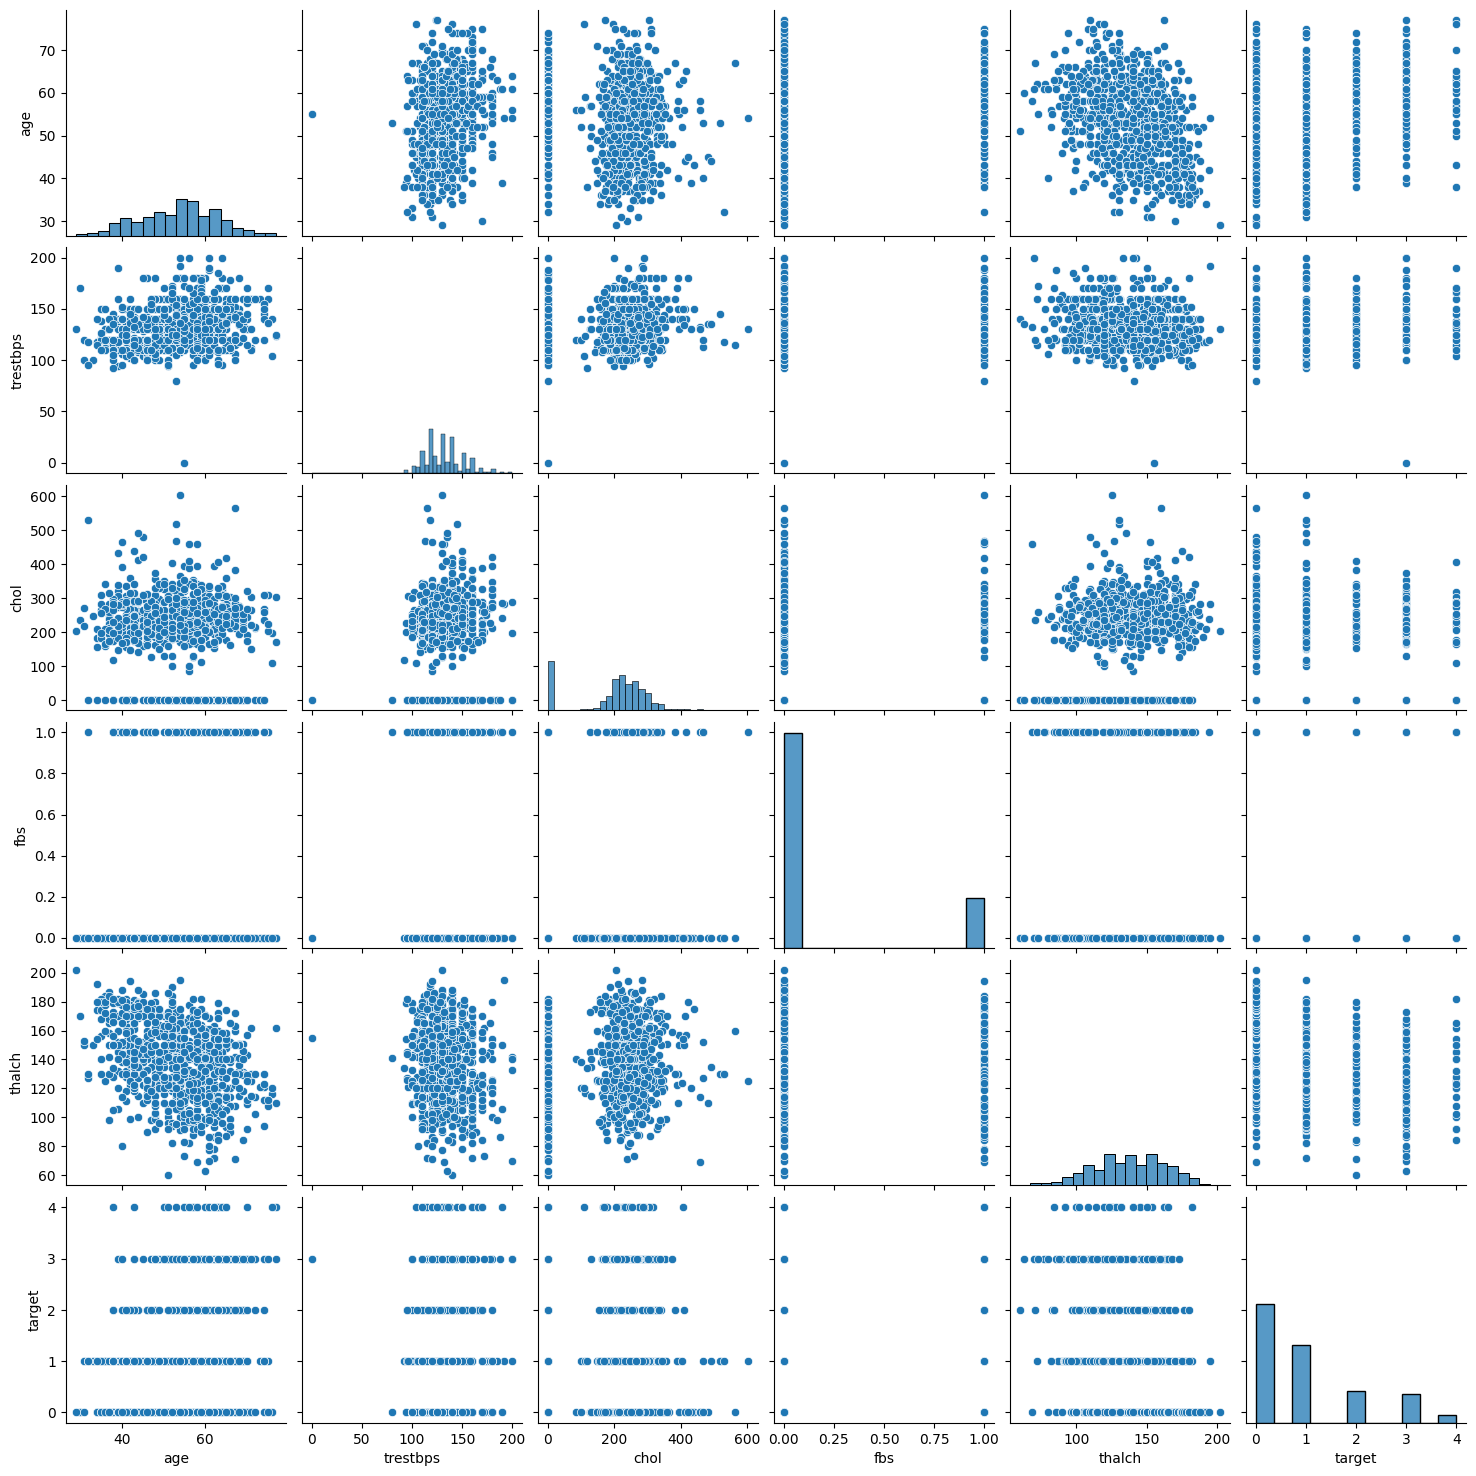

In [22]:
sns.pairplot(df)

<Figure size 1200x1500 with 0 Axes>

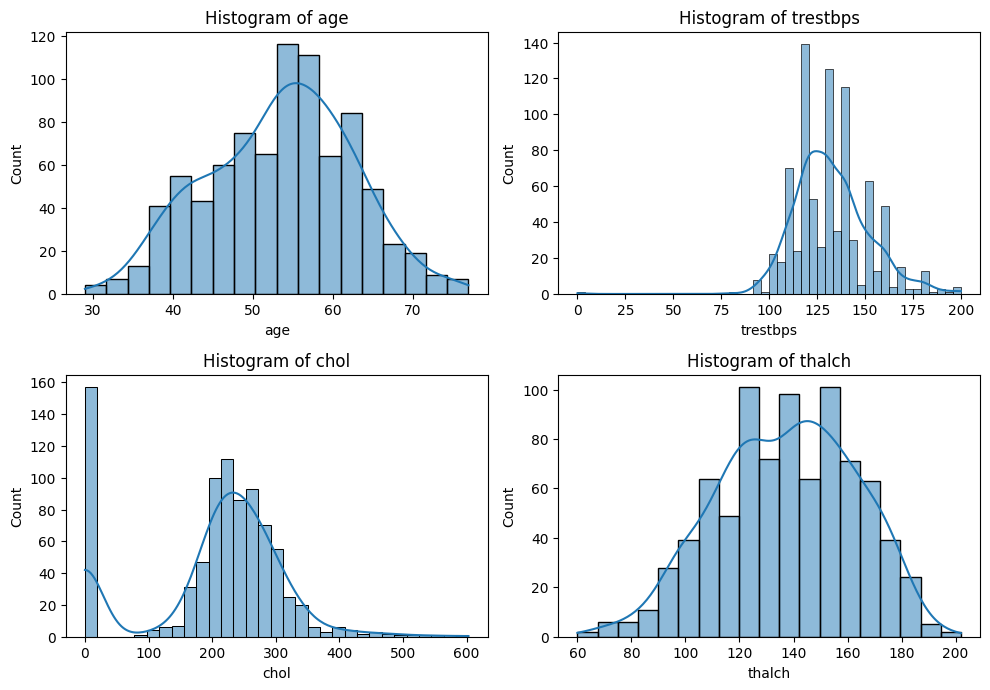

In [23]:
plt.figure(figsize=(12,15))
# Create subplots with 3 rows and 2 columns
plt.figure(figsize=(10, 10))

# Loop through the numerical columns and plot each one
for i, col in enumerate(num_col, 1):  # Start indexing from 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, i-th subplot
    sns.histplot(df[col],kde=True)  # Use column name directly to access data
    plt.title(f"Histogram of {col}") 
    # Add a title for each subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<Figure size 1200x1500 with 0 Axes>

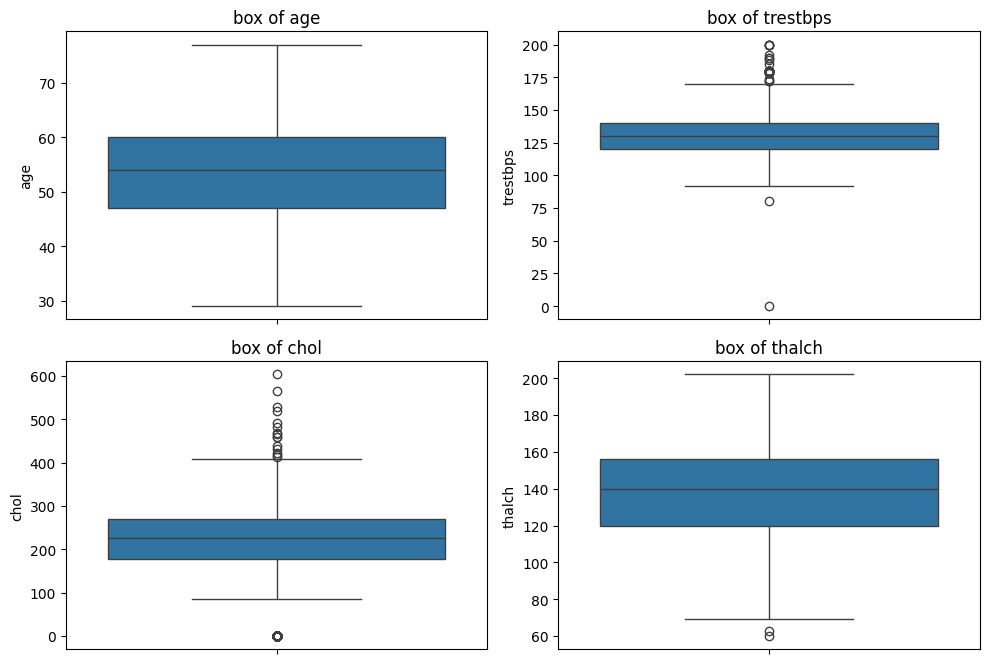

In [24]:
plt.figure(figsize=(12,15))
# Create subplots with 3 rows and 2 columns
plt.figure(figsize=(10, 10))

# Loop through the numerical columns and plot each one
for i, col in enumerate(num_col, 1):  # Start indexing from 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, i-th subplot
    sns.boxplot(df[col])  # Use column name directly to access data
    plt.title(f"box of {col}")  # Add a title for each subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [25]:
# Calculate IQR for each column
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
df[num_col] = df[num_col][~((df[num_col] < lower_bound) | (df[num_col] > upper_bound)).any(axis=1)]

# Display outliers
print("Outliers:")
print(df[num_col])


Outliers:
      age  trestbps   chol  thalch
0    63.0     145.0  233.0   150.0
1    41.0     135.0  203.0   132.0
2    57.0     140.0  192.0   148.0
3    52.0     118.0  186.0   190.0
4    57.0     110.0  201.0   126.0
..    ...       ...    ...     ...
901   NaN       NaN    NaN     NaN
902  62.0     160.0  254.0   108.0
903   NaN       NaN    NaN     NaN
904  62.0     166.0  170.0   120.0
905   NaN       NaN    NaN     NaN

[845 rows x 4 columns]


<Figure size 1200x1500 with 0 Axes>

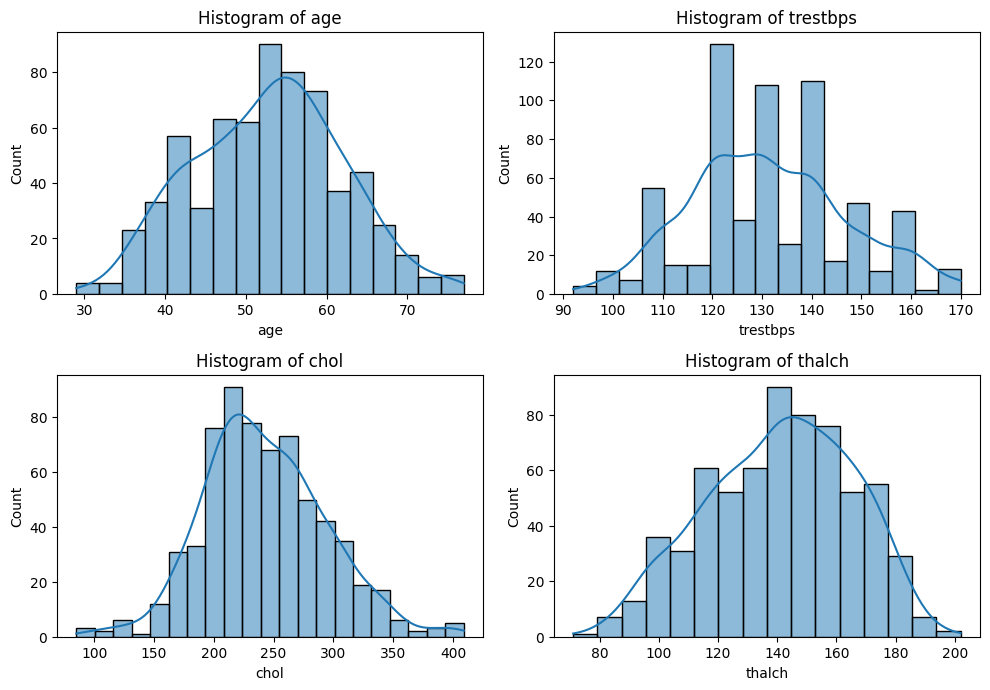

In [26]:
plt.figure(figsize=(12,15))
# Create subplots with 3 rows and 2 columns
plt.figure(figsize=(10, 10))

# Loop through the numerical columns and plot each one
for i, col in enumerate(num_col, 1):  # Start indexing from 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, i-th subplot
    sns.histplot(df[col],kde=True)  # Use column name directly to access data
    plt.title(f"Histogram of {col}") 
    # Add a title for each subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [27]:
df.isnull().sum()

age         192
sex           0
cp            0
trestbps    192
chol        192
fbs           0
restecg       0
thalch      192
exang         0
slope         0
thal          0
target        0
dtype: int64

In [28]:
df.dropna(inplace=True)
df.shape

(653, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 904
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       653 non-null    float64
 1   sex       653 non-null    object 
 2   cp        653 non-null    object 
 3   trestbps  653 non-null    float64
 4   chol      653 non-null    float64
 5   fbs       653 non-null    object 
 6   restecg   653 non-null    object 
 7   thalch    653 non-null    float64
 8   exang     653 non-null    object 
 9   slope     653 non-null    object 
 10  thal      653 non-null    object 
 11  target    653 non-null    object 
dtypes: float64(4), object(8)
memory usage: 66.3+ KB


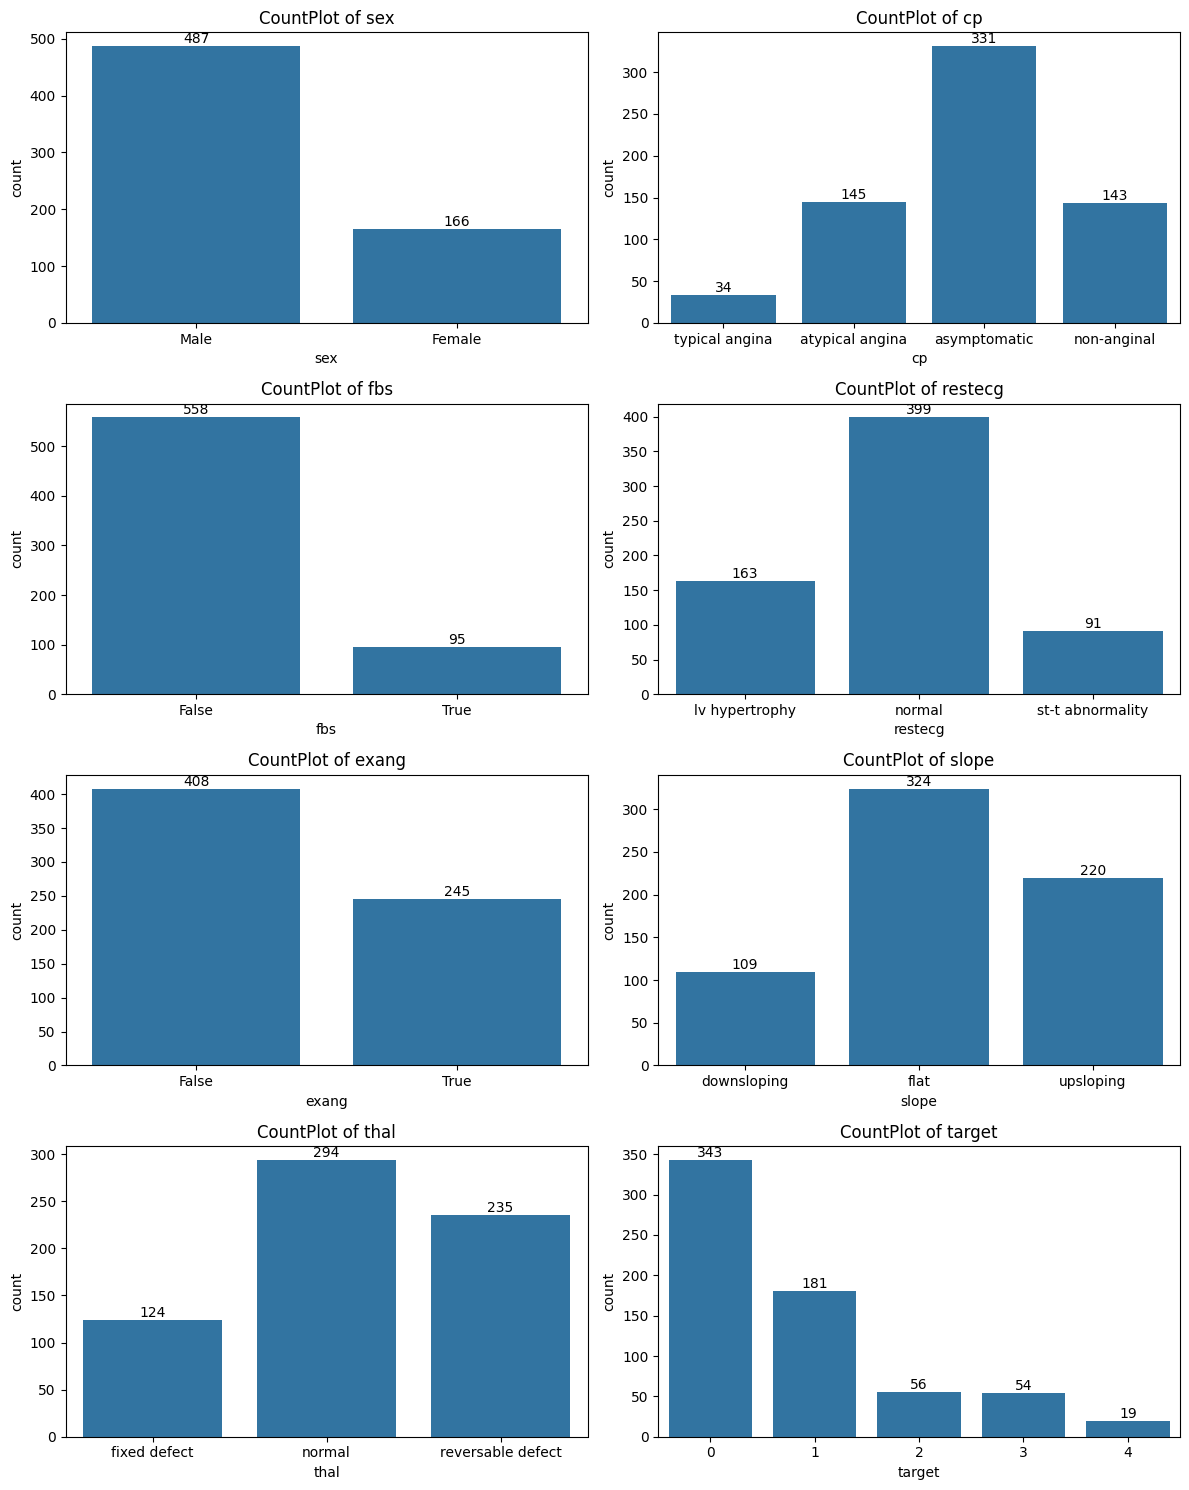

In [30]:
plt.figure(figsize=(12,15))

# Loop through the numerical columns and plot each one
for i, col in enumerate(cat_col, 1):  # Start indexing from 1
    plt.subplot(4, 2, i)  # 3 rows, 2 columns, i-th subplot
    ax = sns.countplot(x=df[col],data=df)  # Correctly reference the column
    ax.bar_label(ax.containers[0])  # Add data labels
    plt.title(f"CountPlot of {col}") # Add a title for each subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




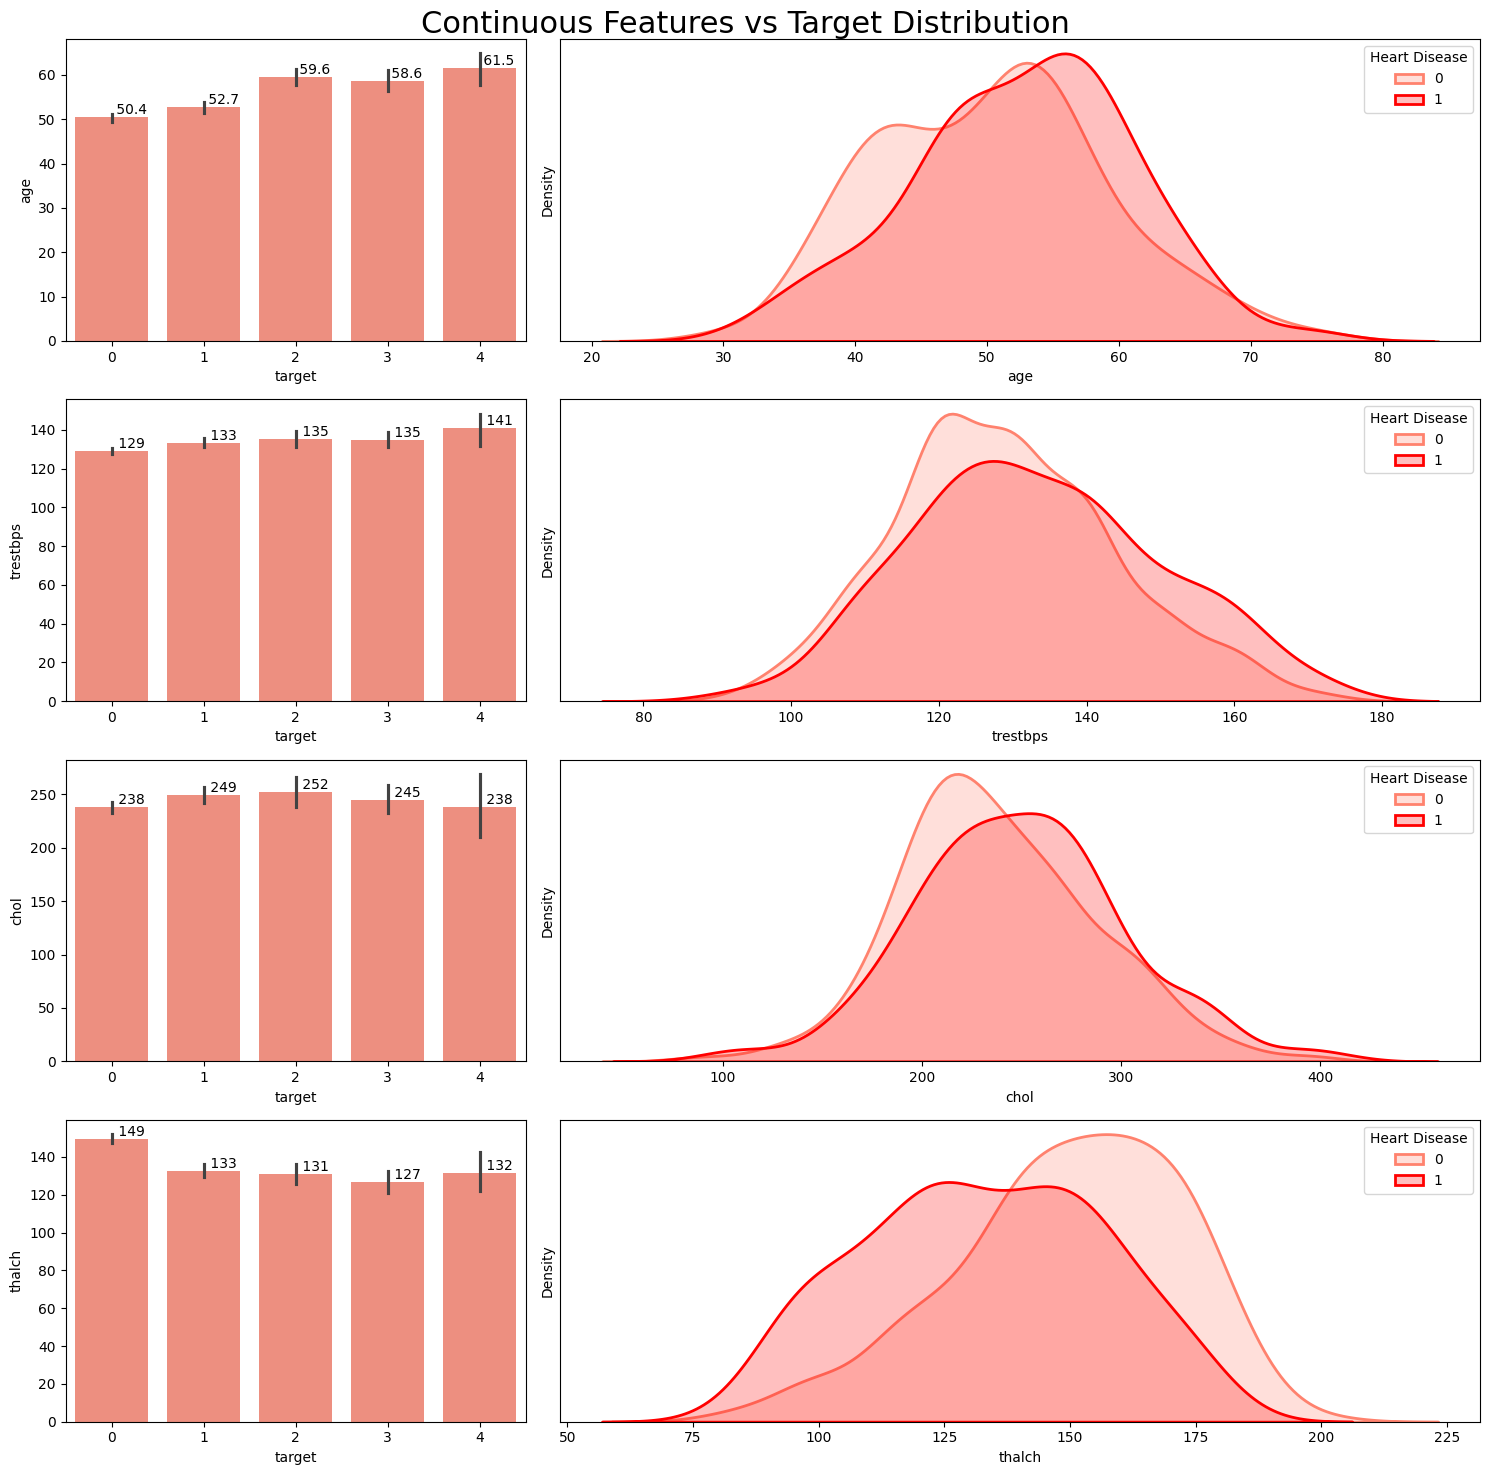

In [31]:
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(num_col), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(num_col):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()
    

In [32]:
df['exang'].value_counts()

exang
False    408
True     245
Name: count, dtype: int64

In [33]:
df['exang'] = df['exang'].replace({'FALSE': False})

C:\Users\krishna\AppData\Local\Temp\ipykernel_9800\3479672604.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'FALSE': False})


In [34]:
df['exang']

0      False
1      False
2      False
3      False
4       True
       ...  
897     True
898     True
899     True
902     True
904     True
Name: exang, Length: 653, dtype: bool

In [35]:
df.describe()

,age,trestbps,chol,thalch
count,653.000000,653.000000,653.000000,653.000000
mean,52.807044,131.445636,242.767228,140.811639
std,9.186020,15.855624,51.140889,24.505409
min,29.000000,92.000000,85.000000,71.000000
25%,46.000000,120.000000,208.000000,123.000000
50%,54.000000,130.000000,238.000000,142.000000
75%,59.000000,140.000000,275.000000,160.000000
max,77.000000,170.000000,409.000000,202.000000


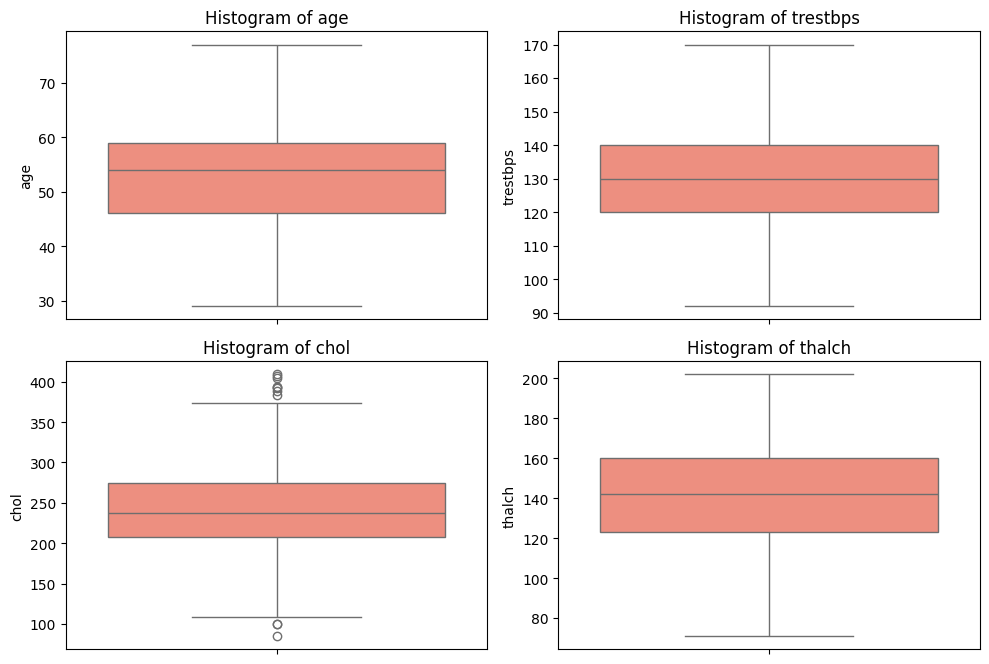

In [36]:
# Create subplots with 3 rows and 2 columns
plt.figure(figsize=(10, 10))

# Loop through the numerical columns and plot each one
for i, col in enumerate(num_col, 1):  # Start indexing from 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, i-th subplot
    sns.boxplot(df[col])  # Use column name directly to access data
    plt.title(f"Histogram of {col}")  # Add a title for each subplot

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [37]:
y=df['target']
y.shape

(653,)

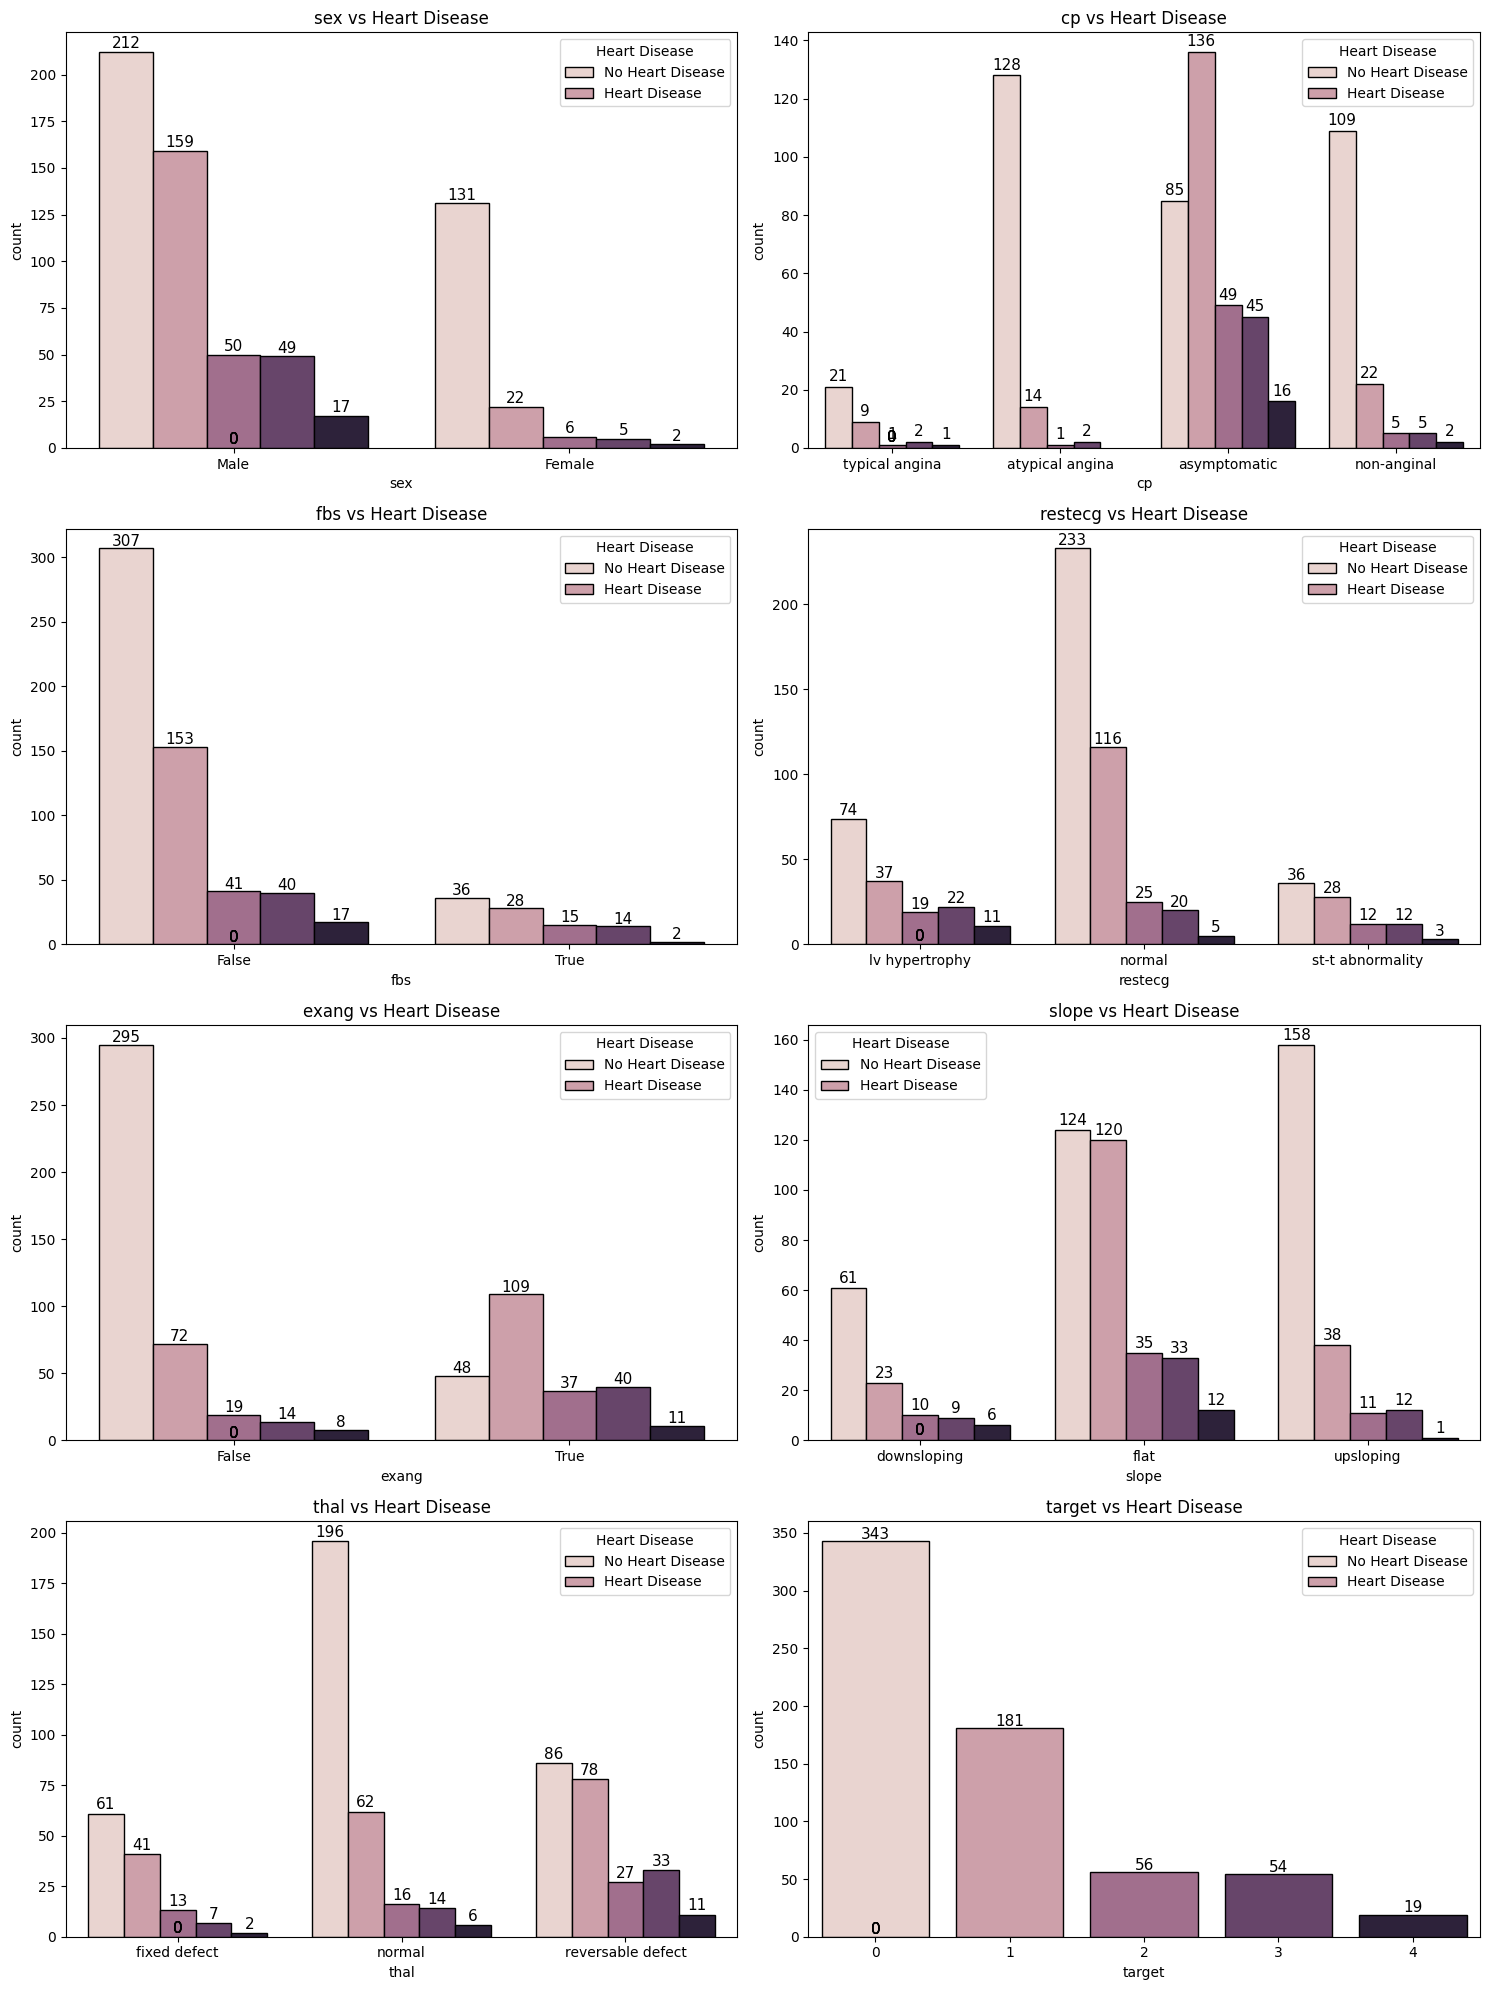

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and cat_col are defined
# Create the subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Loop through each categorical column to plot
for i in range(len(cat_col)):
    sns.countplot(data=df, x=cat_col[i], hue="target", edgecolor='black',ax=ax[i])
    
    # Add the count above each bar
    for rect in ax[i].patches:
        # Get the x position of the bar, width of the bar and height (count) of the bar
        ax[i].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2,
                   int(rect.get_height()), horizontalalignment='center', fontsize=11)
    
    # Set the title of each subplot
    ax[i].set_title(f'{cat_col[i]} vs Heart Disease')
    
    # Set the legend (Seaborn automatically handles it)
    ax[i].legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.
ASY type of chest pain boldly points towards major chances of heart disease.
Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
for col in cat_col:
    df[col] = LabelEncoder().fit_transform(df[col])

In [43]:
df[cat_col]

,sex,cp,fbs,restecg,exang,slope,thal,target
0,1,3,1,0,0,0,0,0
1,1,1,0,1,0,1,0,0
2,1,0,0,1,0,1,0,0
3,1,3,0,0,0,1,0,0
4,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
897,1,0,0,1,1,0,1,4
898,1,0,0,1,1,0,1,4
899,1,0,0,1,1,0,2,4
902,1,0,1,2,1,1,1,4


In [44]:
df.target.value_counts()

target
0    343
1    181
2     56
3     54
4     19
Name: count, dtype: int64

In [45]:
df['target']=df['target'].replace({2:1,3:1,4:1})
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
897    1
898    1
899    1
902    1
904    1
Name: target, Length: 653, dtype: int32

In [46]:
df['target'].value_counts()

target
0    343
1    310
Name: count, dtype: int64

In [47]:
x=df.drop(columns=['target'],axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,slope,thal
0,63.0,1,3,145.0,233.0,1,0,150.0,0,0,0
1,41.0,1,1,135.0,203.0,0,1,132.0,0,1,0
2,57.0,1,0,140.0,192.0,0,1,148.0,0,1,0
3,52.0,1,3,118.0,186.0,0,0,190.0,0,1,0
4,57.0,1,0,110.0,201.0,0,1,126.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
897,63.0,1,0,170.0,177.0,0,1,84.0,1,0,1
898,64.0,1,0,134.0,273.0,0,1,102.0,1,0,1
899,65.0,1,0,136.0,248.0,0,1,140.0,1,0,2
902,62.0,1,0,160.0,254.0,1,2,108.0,1,1,1


In [48]:
y=df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
897    1
898    1
899    1
902    1
904    1
Name: target, Length: 653, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree  import plot_tree
from imblearn.over_sampling import SMOTE

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
smote = SMOTE(random_state=42)
x_train_sampled,y_train_sampled=smote.fit_resample(x_train,y_train)

In [52]:
print(f'Original class distribution:\n{y_train.value_counts()}')
print(f'Resampled class distribution:\n{y_train_sampled.value_counts()}')


Original class distribution:
target
0    267
1    255
Name: count, dtype: int64
Resampled class distribution:
target
1    267
0    267
Name: count, dtype: int64


In [53]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train_sampled, y_train_sampled)

DecisionTreeClassifier(max_depth=3)

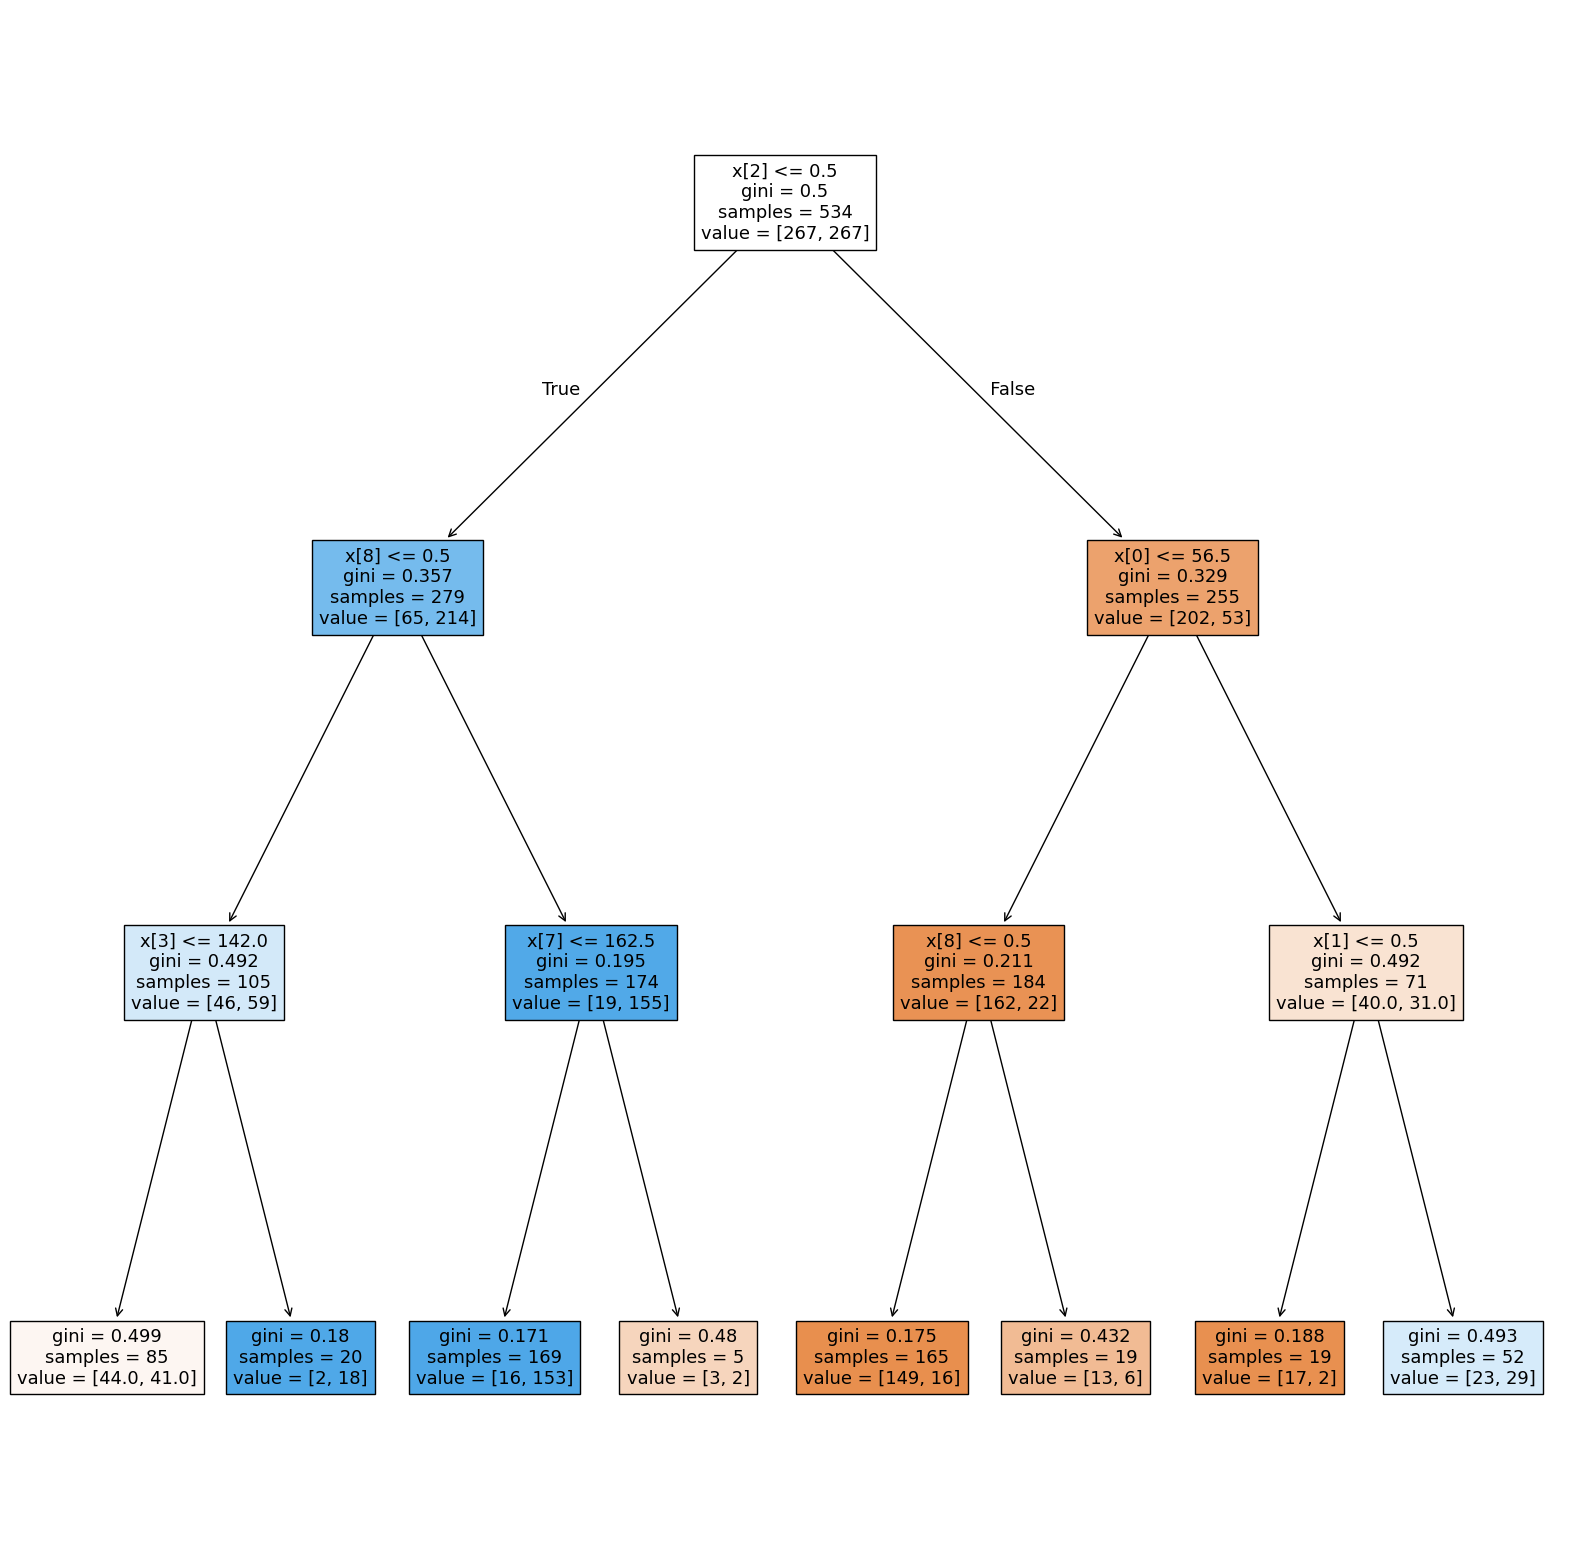

In [54]:
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True)
plt.show()

In [55]:
y_pred=clf.predict(x_test)

In [56]:
print("The prediction of x_test are:",y_pred)

The prediction of x_test are: [0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [57]:
from sklearn.metrics import accuracy_score,classification_report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8015267175572519


In [58]:
repot=classification_report(y_test,y_pred)
print(repot)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        76
           1       0.80      0.71      0.75        55

    accuracy                           0.80       131
   macro avg       0.80      0.79      0.79       131
weighted avg       0.80      0.80      0.80       131



In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
cvclf = DecisionTreeClassifier()

# Define the parameter grid (replace with your actual parameters)
parameter = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10]}

# Perform GridSearchCV
cv = GridSearchCV(estimator=cvclf, param_grid=parameter, cv=5, scoring='accuracy')

# Fit the model
cv.fit(x_train_sampled, y_train_sampled)

# Display best parameters and score
print("Best Parameters:", cv.best_params_)
print("Best Accuracy Score:", cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3}
Best Accuracy Score: 0.7528478222535708


In [61]:
# Display best parameters and score
print("Best Parameters:", cv.best_params_)
print("Best Accuracy Score:", cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3}
Best Accuracy Score: 0.7528478222535708


In [62]:
y_predt=cv.predict(x_test)

In [63]:
y_predt

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [64]:
accuracy_score(y_test, y_predt)

0.8015267175572519

In [65]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 3}

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Here are 5 common hyperparameters of decision tree models and how they affect performance:

1.max_depth:

Effect: Controls the depth of the tree.
Shallow trees (low max_depth) → Underfitting (high bias, poor performance).
Deep trees (high max_depth) → Overfitting (high variance, poor generalization).
2.min_samples_split:

Effect: Minimum samples required to split an internal node.
Higher values → Simpler tree, reduced overfitting, but may underfit.
Lower values → More complex tree, increased overfitting.
3.min_samples_leaf:

Effect: Minimum samples required at a leaf node.
Higher values → Prevents overfitting, but can underfit if set too high.
Lower values → Allows more detailed splits, increasing the risk of overfitting.
4.max_features:

Effect: Number of features to consider when splitting.
Smaller values → Faster training, less overfitting, but may underfit.
Larger values → More complex tree, higher risk of overfitting.
5.criterion:

Effect: The function to measure the quality of a split (e.g., gini or entropy).
gini → Faster to compute, often results in a tree that is less balanced.
entropy → More balanced splits but computationally more expensive.
These hyperparameters balance model complexity, bias, and variance, affecting the model's generalization ability.

# 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Transforms categories into numerical labels. Useful for ordinal data, but may introduce unintended order relationships.


One-Hot Encoding: Transforms categories into binary vectors. Suitable for nominal data but can increase dimensionality significantly.